# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [4]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

## define the feature function for each data to obtain the best accuracy

In [124]:
def feature_function1(x, y):
    # [[f0(x1,y1), f1(x1,y1), ...,  fn(x1,y1)], ... [..fk(xn, yn)]]
    # 원형 -R^2 + x^2 + y^2
    feature = np.column_stack((np.ones((x.shape[0],)), x, y, np.power(x,2), np.power(y,2)))

    return feature

In [125]:
def feature_function2(x, y):
    
    feature = np.column_stack((np.ones((x.shape[0],)), x, y, np.power(x,2), np.power(y,2), np.power(x,3), np.power(y,3)))
    
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [126]:
def regression_function(theta, feature):
    # linear combinatin
    
    value = np.sum(theta * feature, axis=1)
    
    return value

## define sigmoid function with input $x$

In [127]:
def logistic_function(x):
    # sigmoid function
    
    exp = np.exp(-x)
    z = 1 / (1 + exp)
    
    return z

## define loss function with feature and label based on the logistic regression

In [128]:
def compute_loss_feature(theta, feature, label):
    # cross entropy
    
    x = regression_function(theta, feature)
    h = logistic_function(x)
    summation = -label * np.log(h)  - ((1-h) * np.log(1-h))
    loss = np.mean(summation)
    
    return loss

## define gradient vector for the model parameters $\theta$

In [129]:
def compute_gradient_feature(theta, feature, label):
    # theta에 대한 gradient vector 한 번에 계산
    
    x = regression_function(theta, feature)
    h = logistic_function(x)
    gradient = np.dot(feature.T, (h - label)) / feature.shape[0] # 행렬곱 순서
    
    return gradient

## compute the accuracy

In [130]:
def compute_accuracy(theta, feature, label):
    '''
    logistic regresstion 함수의 값이 0.5와 비교하여 feature들의 class 결정
    label과 비교해 정확도 계산
    -> data 수로 나누어 0~1 까지의 값
    '''
    
    x = regression_function(theta, feature)
    h = logistic_function(x)
    
    h_label = np.where(h >= 0.5, 1, 0)
    cmp = (h_label == label)
    accuracy = np.count_nonzero(cmp == True) / feature.shape[0]
    
    return accuracy

## Normalization: Z-scoring

In [131]:
def z_scoring(data):
    # center the data

    m = np.mean(data, axis=0)
    data = np.subtract(data, m)

    # varaiance normalizaion
    sigma = np.std(data, axis=0)
    data = data / sigma
    
    return data[:,0], data[:,1]

## Stopping condition
stoppting condition: 30000번 모두 반복하도록 아주 작은 값으로 설정함.

In [95]:
def check_error_rate(loss_k, loss_k1):
    # convergence
    return True if ((loss_k1 - loss_k) <= 10**(-10000)) and (loss_k1 != 0) else False

## gradient descent for the model parameters  𝜃

In [149]:
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate

# set label data
label1 = data1[:,2]
label2 = data2[:,2]

# data normalization
x1, y1 = z_scoring(data1[:,0:2])
x2, y2 = z_scoring(data2[:,0:2])

# feature function
feature1 = feature_function1(x1, y1)
feature2 = feature_function2(x2, y2)

theta1 = np.zeros((feature1.shape[1],))
theta2 = np.zeros((feature2.shape[1],))

max_iteration = num_iteration # 추후에 결과 값을 보고 조정할 것임.

theta1_iteration = np.zeros((max_iteration, theta1.size))
loss1_iteration  = np.zeros(max_iteration)
theta2_iteration = np.zeros((max_iteration, theta2.size))
loss2_iteration  = np.zeros(max_iteration)

In [150]:
for i in range(max_iteration):
    #data1
    loss1 = compute_loss_feature(theta1_iteration[i-1], feature1, label1)
    theta1 = theta1_iteration[i-1] - learning_rate * compute_gradient_feature(theta1, feature1, label1)
    
    loss1_iteration[i] = loss1
    theta1_iteration[i] = theta1
    
    
    # data2
    loss2 = compute_loss_feature(theta2_iteration[i-1], feature2, label2)
    theta2 = theta2_iteration[i-1] - learning_rate * compute_gradient_feature(theta2, feature2, label2)
    
    loss2_iteration[i] = loss2
    theta2_iteration[i] = theta2
    
    if check_error_rate(loss1, loss1_iteration[i-1]) and check_error_rate(loss2, loss2_iteration[i-1]):
        theta1_optimal, theta2_optimal = theta1, theta2
        break

X = np.linspace(0, num_iteration, max_iteration)
    
#     print("iteration = %4d, loss = %5.9f" % (i, loss2))

theta1_optimal = theta1
theta2_optimal = theta2
X = np.linspace(0, num_iteration, max_iteration)

<ipython-input-128-859c5446eccc>:6: RuntimeWarning: divide by zero encountered in log
  summation = -label * np.log(h)  - ((1-h) * np.log(1-h))
<ipython-input-128-859c5446eccc>:6: RuntimeWarning: invalid value encountered in multiply
  summation = -label * np.log(h)  - ((1-h) * np.log(1-h))


In [108]:
print(feature1)

[[ 1.          0.7289581  -0.15404421  0.53137991  0.02372962]
 [ 1.          0.76461114  0.1070675   0.58463019  0.01146345]
 [ 1.          0.89477076  0.10179817  0.80061472  0.01036287]
 ...
 [ 1.          1.77843964 -0.14277133  3.16284754  0.02038365]
 [ 1.          2.02604143  0.09677059  4.10484388  0.00936455]
 [ 1.          1.60564121 -0.06901413  2.57808368  0.00476295]]


## compute accuracy of the classifiers

In [151]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
print("Accuracy data1 = %1.9f" % accuracy_classifier1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)
print("Accuracy data2 = %1.9f" % accuracy_classifier2)

Accuracy data1 = 0.999000000
Accuracy data2 = 0.998000000


## plot the results

In [152]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')

    plt.plot(X, loss_iteration, color='red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [153]:
def plot_data(data):
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('data')
    
    class1 = np.where(data[:,2] == 1)
    class0 = np.where(data[:,2] == 0)

    plt.scatter(data[:,0][class0], data[:,1][class0], color='blue', label='class=0', s=5)
    plt.scatter(data[:,0][class1], data[:,1][class1], color='red', label='class=1', s=5)
    
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [154]:
def plot_model_parameter(theta_iteration):
    
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')
    
    for i, theta in enumerate(np.hsplit(theta_iteration, theta_iteration.shape[1])):
        plt.plot(X, theta, label=r'$\theta_'+str(i)+'$')
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

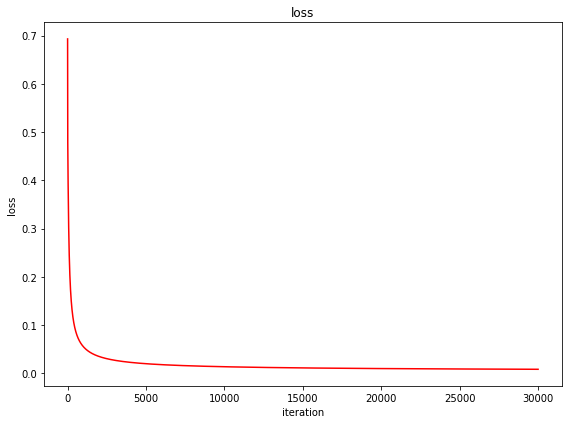

In [155]:
plot_loss_curve(loss1_iteration)

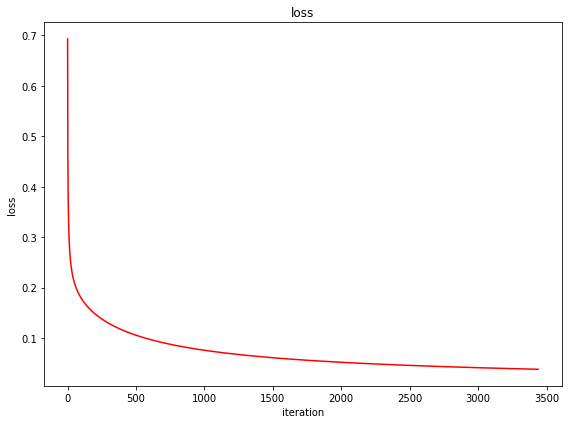

In [156]:
plot_loss_curve(loss2_iteration)

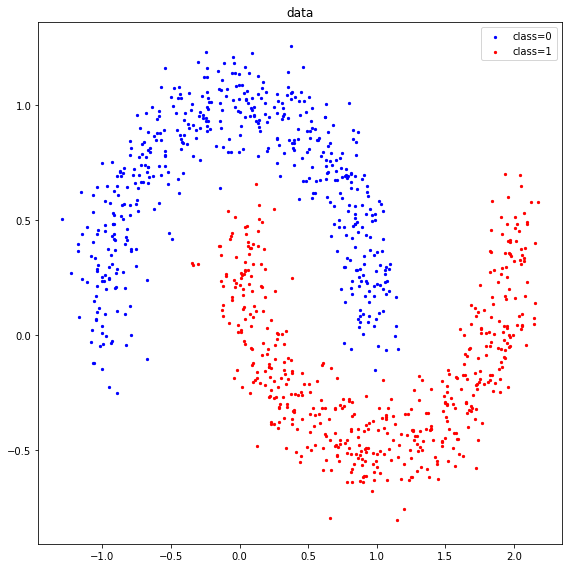

In [157]:
plot_data(data2)

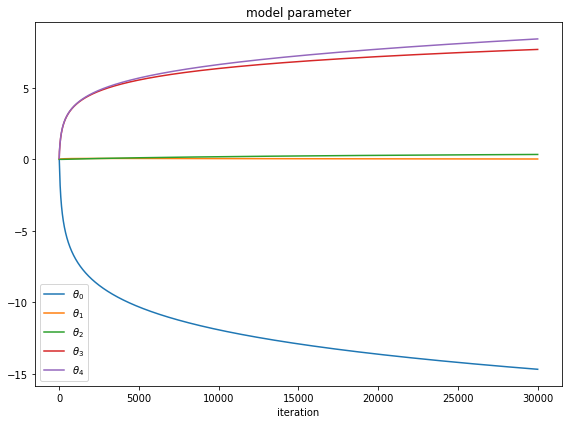

In [158]:
plot_model_parameter(theta1_iteration)

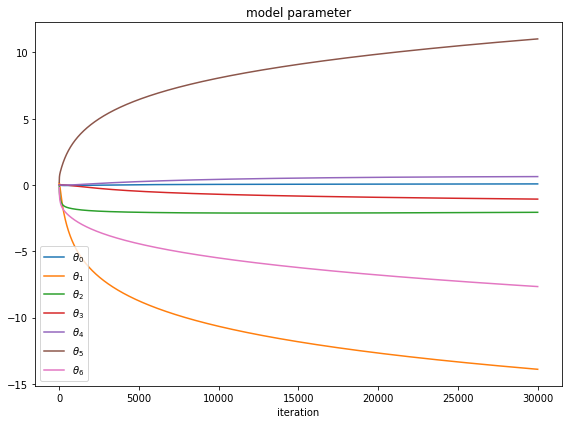

In [159]:
plot_model_parameter(theta2_iteration)

In [160]:
def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
        
    # 범위 지정
    n = 1000
    dif = 0.05
    x = np.linspace(min(data[:,0])-dif, max(data[:,0])+dif, n)
    y = np.linspace(min(data[:,1])-dif, max(data[:,1])+dif, n)
    
    xx, yy = np.meshgrid(x, y)
    classfier = np.empty((0,n), dtype=np.float64)
    
    # sigmod
    for i in range(n):
        feature = feature_function1(xx[i], yy[i])
        z = regression_function(theta, feature)
        classfier = np.vstack((classfier,logistic_function(z)))
    
    cs = plt.contourf(xx, yy, classfier, levels=100, cmap="RdBu_r")
    plt.colorbar()
    
    # 0.5 표시
    plt.contour(cs, levels=[0.5, 0.5] ,colors='black')
    
    # data 표시
    class1 = np.where(data[:,2] == 1)
    class0 = np.where(data[:,2] == 0)
    
    ## z-scoring 데이터를 넣어야 함!!!!!!
    plt.scatter(x1[class0], y1[class0], color='blue', label='class=0', s=5)
    plt.scatter(x1[class1], y1[class1], color='red', label='class=1', s=5)
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [161]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
            
    # 범위 지정
    n = 1000
    dif = 1.3
    x = np.linspace(min(data[:,0])-dif, max(data[:,0])+dif, n)
    y = np.linspace(min(data[:,1])-dif, max(data[:,1])+dif, n)
    
    xx, yy = np.meshgrid(x, y)
    classfier = np.empty((0,n), dtype=np.float64)
    
    # sigmod
    for i in range(n):
        feature = feature_function2(xx[i], yy[i])
        z = regression_function(theta, feature)
        classfier = np.vstack((classfier,logistic_function(z)))
    
    cs = plt.contourf(xx, yy, classfier, levels=100, cmap="RdBu_r")
    plt.colorbar()
    
    # 0.5 표시
    plt.contour(cs, levels=[0.5, 0.5] ,colors='black')
    
    # data 표시
    class1 = np.where(data[:,2] == 1)
    class0 = np.where(data[:,2] == 0)
    
    ## z-scoring 데이터를 넣어야 함!!!!!!
    plt.scatter(x2[class0], y2[class0], color='blue', label='class=0', s=5)
    plt.scatter(x2[class1], y2[class1], color='red', label='class=1', s=5)
    
    plt.legend()
    plt.tight_layout()
    plt.show()

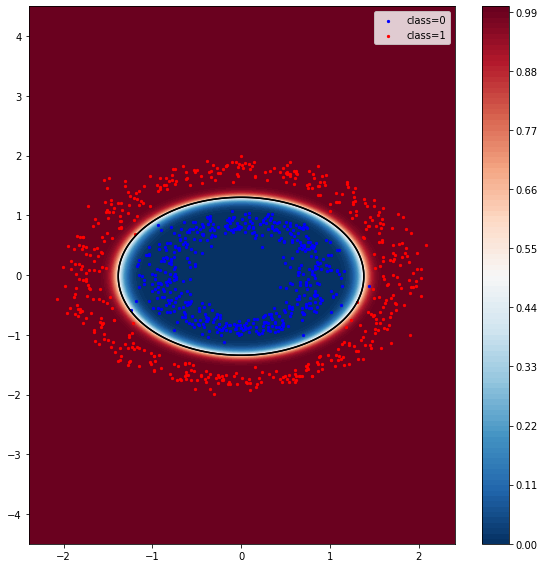

In [162]:
plot_classifier1(data1, theta1_optimal)

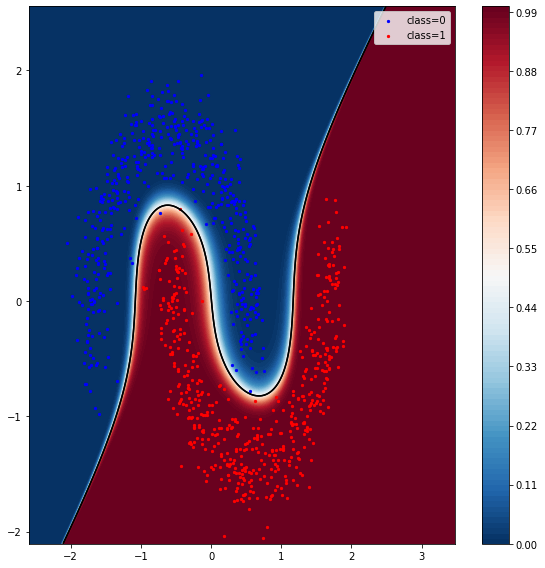

In [163]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

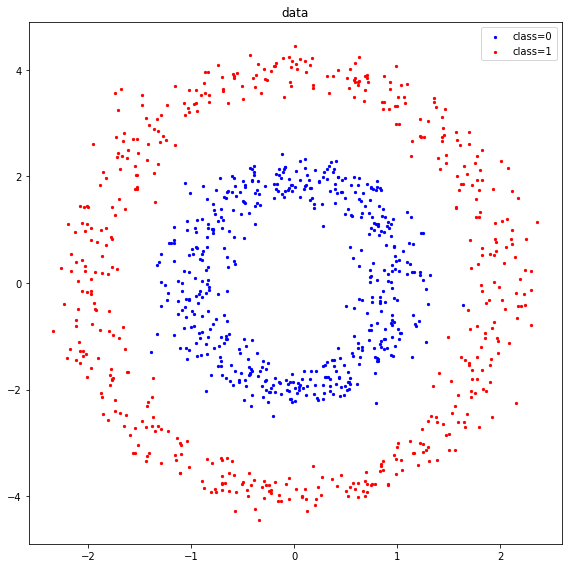

In [164]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

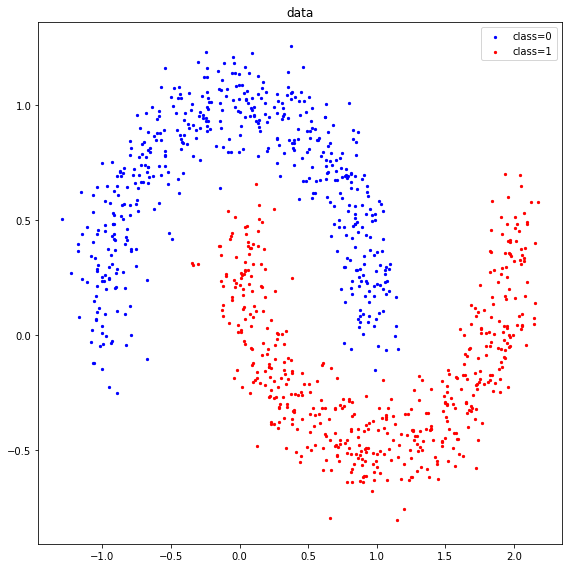

In [165]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

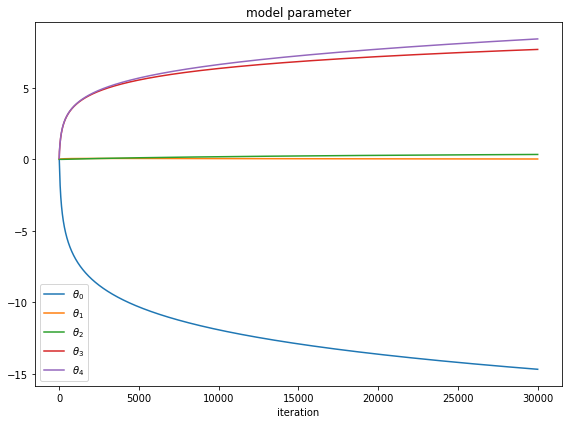

In [166]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

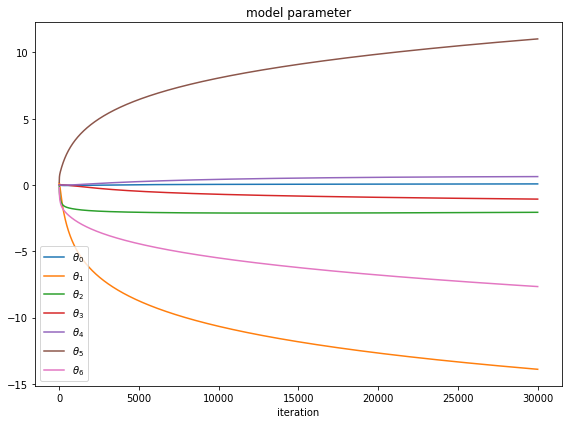

In [167]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

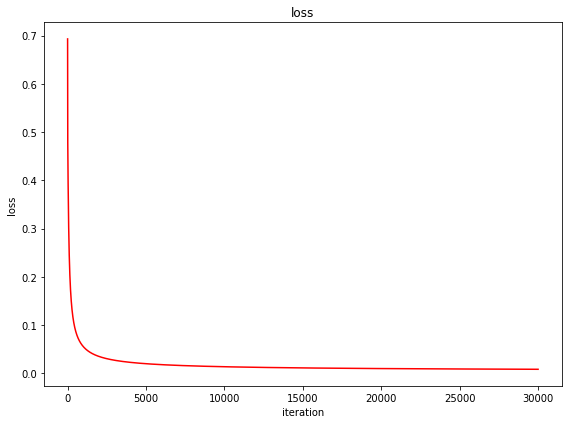

In [168]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

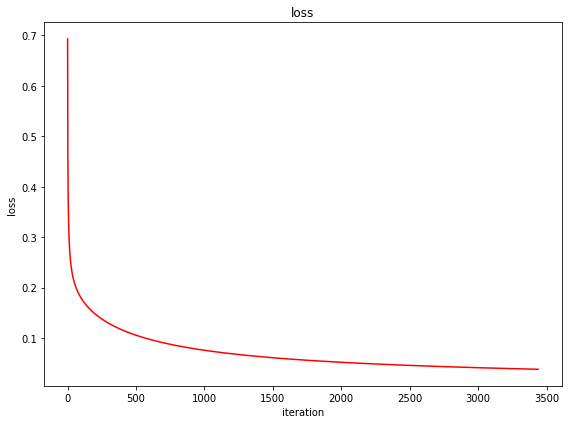

In [169]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

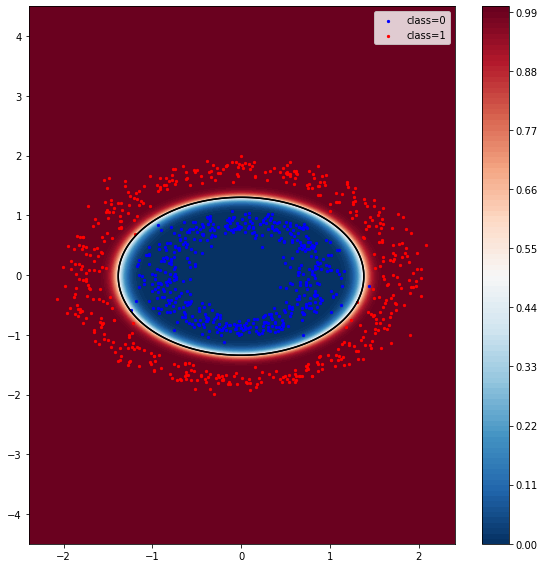

In [170]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

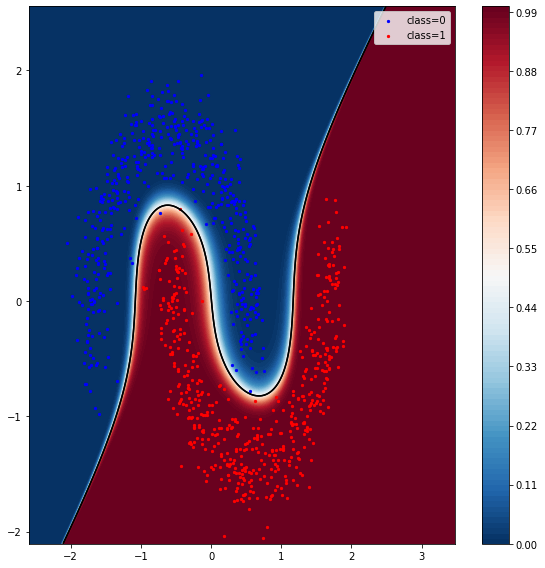

In [171]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [172]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [173]:
print(accuracy_classifier2)

0.998
